### Objetivo del Taller como Consultor:

Como consultor especializado en análisis de datos y retención de clientes en el sector bancario, mi objetivo principal es capacitar y equipar a los participantes con las herramientas y conocimientos necesarios para identificar, analizar y entender los factores críticos que influencian la decisión de un cliente de continuar o terminar su relación con el banco. Buscamos proporcionar una comprensión profunda de cómo aplicar técnicas estadísticas y de machine learning para predecir y mitigar la pérdida de clientes, optimizando así las estrategias de retención y mejorando la salud financiera y reputacional del banco.

A continuación, se describen cada uno de los campos incluidos en el conjunto de datos:

- **Row Numbers**: Números de fila desde 1 hasta 10000.

- **CustomerId**: Identificadores únicos para la identificación del cliente del banco.

- **Surname**: Apellido del cliente.

- **CreditScore**: Puntuación de crédito del cliente.

- **Geography**: País al que pertenece el cliente.

- **Gender**: Género del cliente, puede ser Masculino o Femenino.

- **Age**: Edad del cliente.

- **Tenure**: Número de años que el cliente ha estado con el banco.

- **Balance**: Saldo bancario del cliente.

- **NumOfProducts**: Número de productos bancarios que el cliente está utilizando.

- **HasCrCard**: Indicador binario (Flag) que señala si el cliente posee una tarjeta de crédito del banco o no.

- **IsActiveMember**: Indicador binario (Flag) que señala si el cliente es un miembro activo del banco o no.

- **EstimatedSalary**: Salario estimado del cliente en dólares.

- **Exited**: Indicador binario, 1 si el cliente cerró su cuenta con el banco y 0 si el cliente sigue retenido.

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
plt.style.use('fivethirtyeight')

In [ ]:
URL = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTO9ZWjOuUohaGDOfAGPao2bbtcu_pf1Mf0IP0KHU9MH9FSNphxDdthR3q0fih-2ZY-_qStSQlMZY7Z/pub?output=csv'

In [ ]:
data = pd.read_csv(URL)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Aquí observamos que tenemos 3 características categóricas: Apellidos, Geografía y Sexo. El resto de características son numéricas, es decir, int o float

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


El uso de la función describir siempre proporciona información interesante sobre los datos. Como puede ver, tenemos los valores medios de permanencia, que nos pueden ayudar a determinar cuánto tiempo permanece el cliente en el banco. También hay información adicional como el saldo mínimo y máximo, el salario estimado, etc.

In [ ]:
data.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Observamos que entre 10000 personas, **2037** clientes han dejado de tratar con la organización. Esto supone alrededor del **20%** del total de clientes. Este es también un problema de desequilibrio de clases que hay que tratar adecuadamente para asegurarnos de que nuestros datos no se ajustan en exceso a la condición de que el cliente se quede. Más adelante hablaremos de ello.

In [ ]:
data.drop(columns=['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)

# Exploratory Data Analysis

<Axes: xlabel='Exited', ylabel='count'>

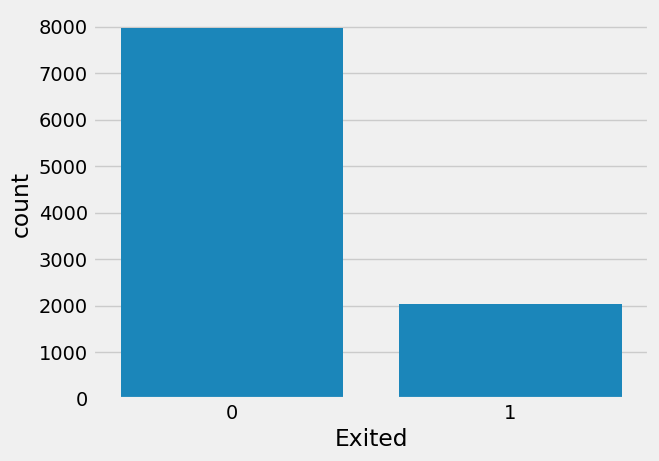

In [ ]:
sns.countplot(x = 'Exited', data=data)

<Axes: xlabel='Gender', ylabel='count'>

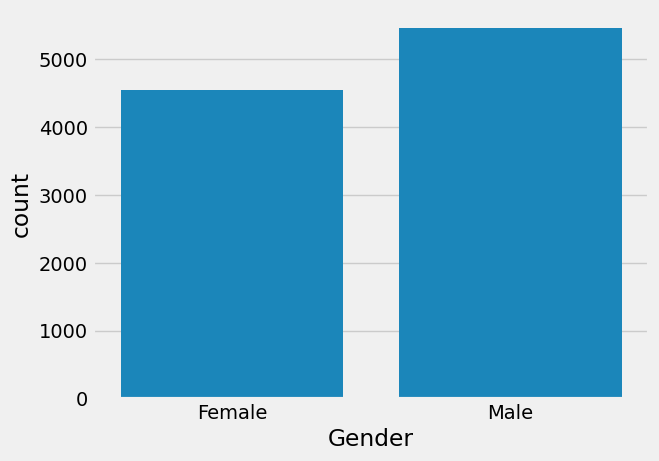

In [ ]:
sns.countplot(x = 'Gender', data=data)

No hay mucha diferencia en la proporción de géneros masculino y femenino como



<Axes: xlabel='Geography', ylabel='count'>

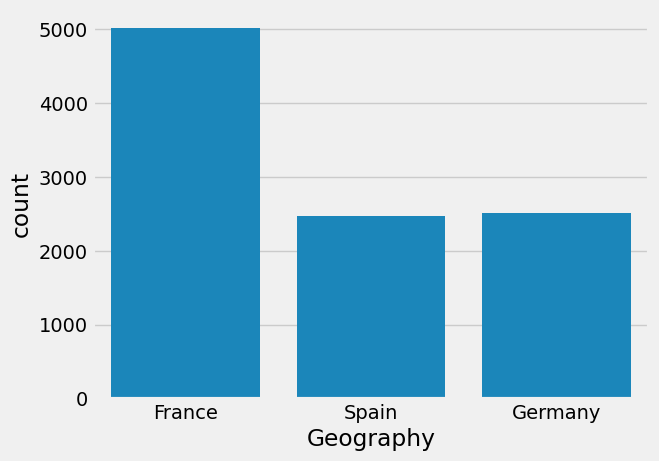

In [ ]:
sns.countplot(x = 'Geography', data=data)

:La mayoría de nuestros clientes (aproximadamente el 50%) viven en **Francia**, mientras que Alemania y España tienen casi el mismo número de clientes.

In [ ]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<Axes: >

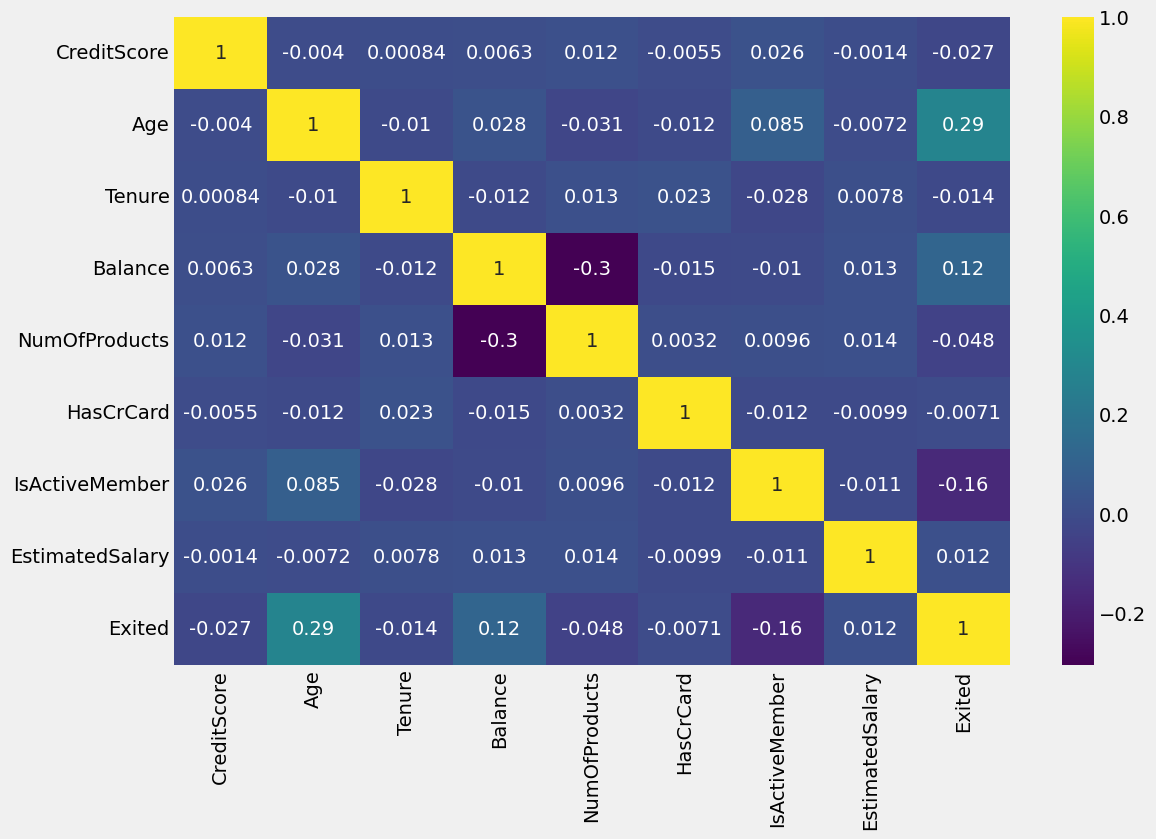

In [ ]:
data1=pd.DataFrame()
data1 = data.drop(columns=['Geography','Gender'], axis=1)

plt.figure(figsize = (12,8))
sns.heatmap(data1.corr(),annot=True, cmap='viridis')

Nuestra variable objetivo es **Salido** y en la matriz de correlaciones vemos que no hay correlaciones fuertes con ninguna de las características correspondientes a la variable objetivo. **La edad** está ligeramente correlacionada.

<Axes: xlabel='Age', ylabel='Exited'>

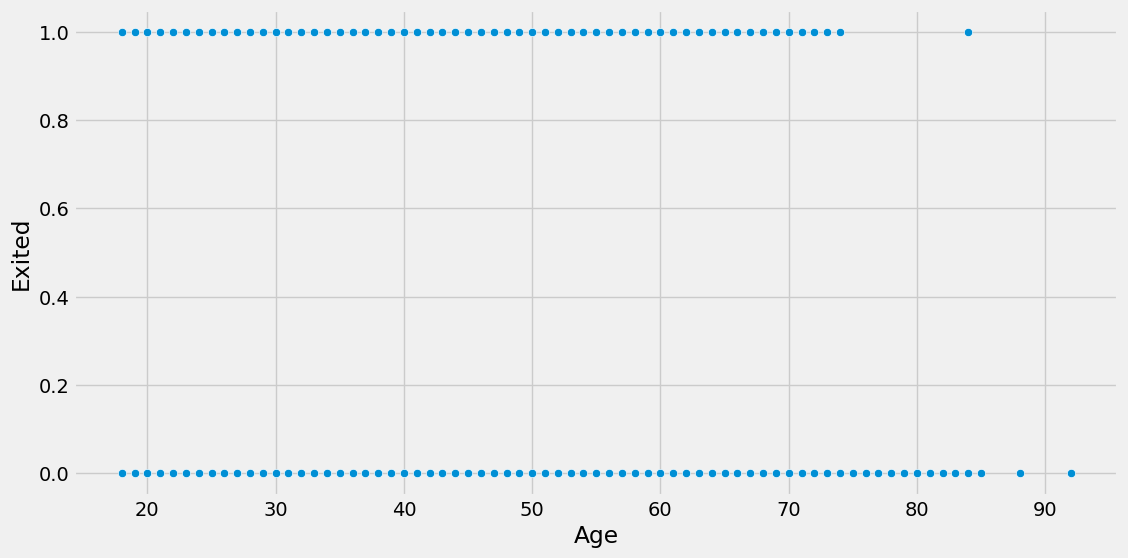

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=data['Age'], y = data['Exited'])

En el diagrama de dispersión se observa que las personas mayores de 73 años no han abandonado la empresa. Esto significa que las personas que envejecen no suelen abandonar la organización. Sin embargo, hay un valor atípico en torno a los 83 años.

<Axes: xlabel='Balance', ylabel='EstimatedSalary'>

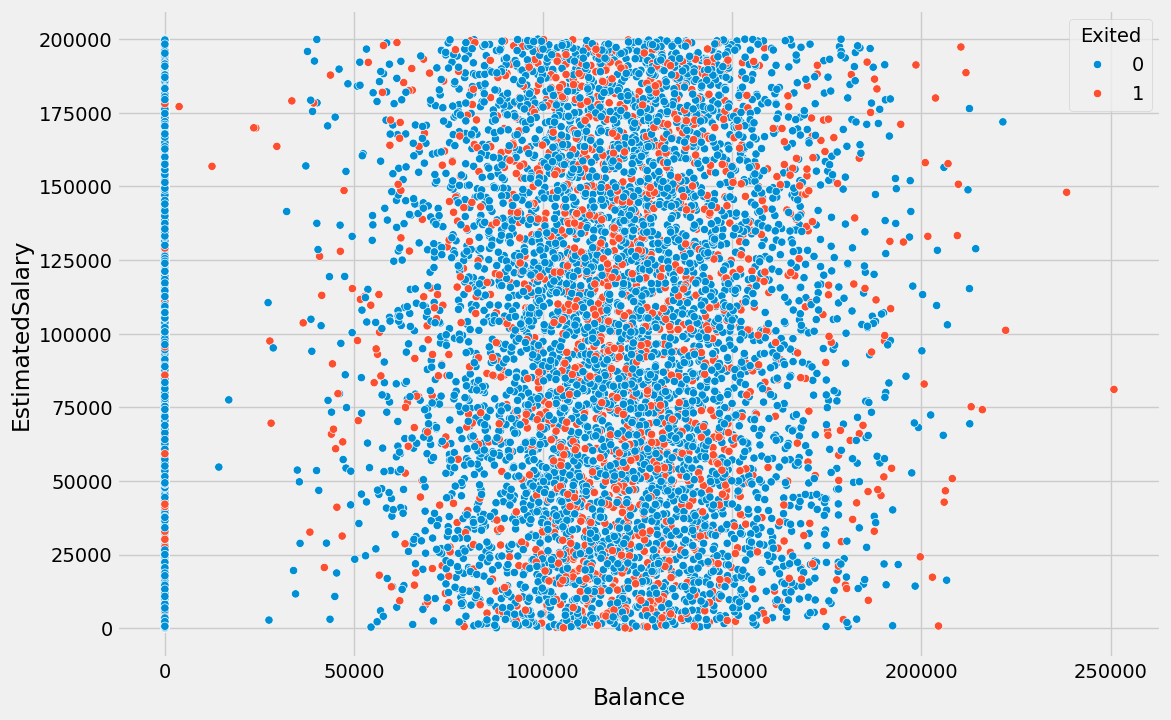

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = data['Balance'], y = data['EstimatedSalary'], hue = data['Exited'])

<Axes: xlabel='Exited', ylabel='Age'>

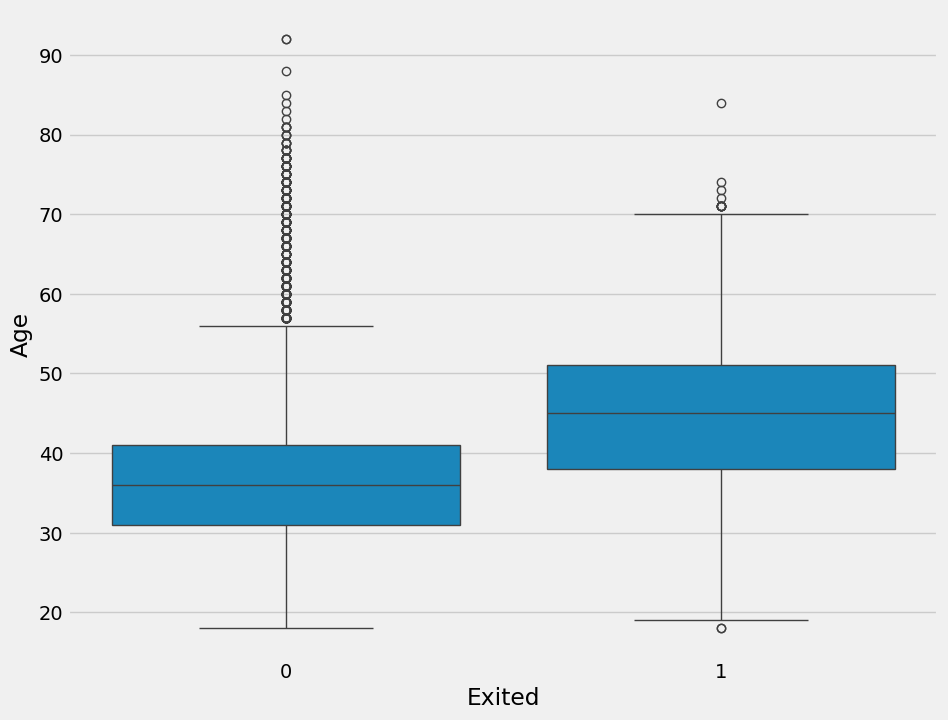

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(data=data, x = 'Exited', y = 'Age')

En el diagrama de caja podemos ver que la edad media de las personas que abandonan es de 45 años, frente a los 36 años de las personas que se quedan. Vemos un gran número de valores atípicos en el segmento de los que se quedan.

<Axes: xlabel='Exited', ylabel='Balance'>

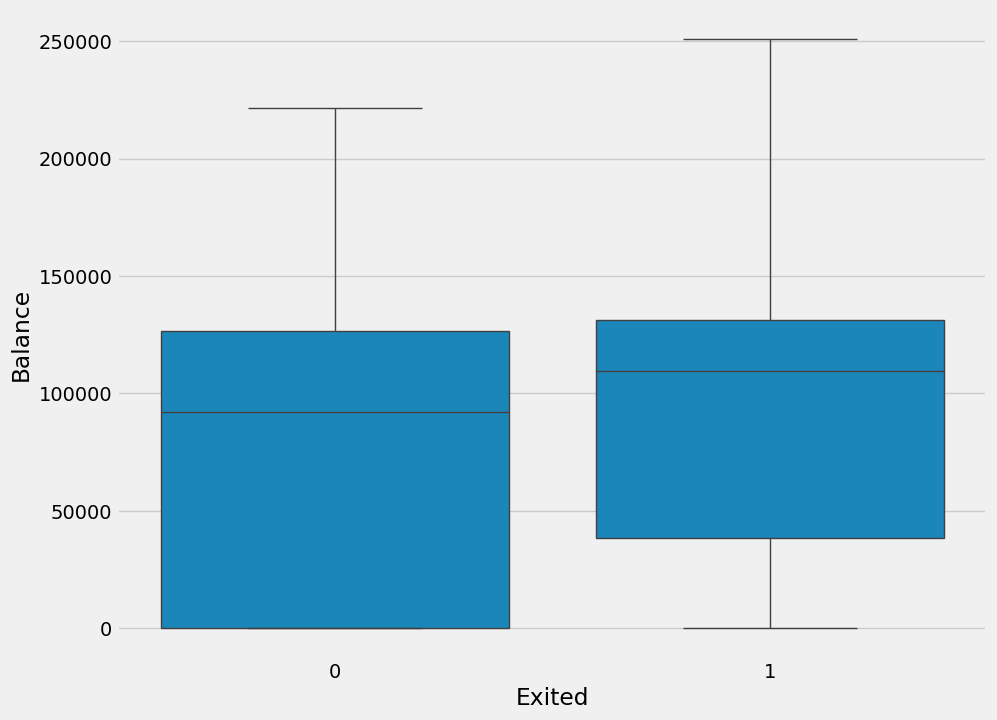

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(data=data, x = 'Exited', y = 'Balance')

Vemos que las personas que salen tienen un saldo medio ligeramente superior al de las que se quedan.

In [ ]:
data.groupby('IsActiveMember')['Exited'].value_counts()

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: count, dtype: int64

El **45%** de los clientes están inactivos y no han salido de la organización. Podemos suponer sin temor a equivocarnos que estas personas se han olvidado de su cuenta o han guardado su dinero en ahorros. El motivo de preocupación es que el 36% de los clientes que utilizaban activamente los servicios han abandonado la organización.

In [ ]:
data.groupby('IsActiveMember')['Balance'].mean()

IsActiveMember
0    77134.376863
1    75875.422145
Name: Balance, dtype: float64

No hay grandes diferencias en el equilibrio entre miembros activos e inactivos.

# Data Cleaning

In [ ]:
data=pd.concat([data, pd.get_dummies(data.Geography)], axis=1)
data.drop('Geography', axis=1, inplace=True)

Ahora convertimos el elemento Geografía en tres elementos distintos en función del país y eliminamos el elemento Geometría.

In [ ]:
data['Gender'] = data['Gender'].apply(lambda x : 1 if x=='Female' else 0)

Convertimos el género de categórico a numérico asignando la etiqueta 1 a Femenino y 0 a Masculino. Sin intención sexista

Puede que se pregunte por qué convertimos todas las características categóricas en valores numéricos. La razón es que la mayoría de los algoritmos de aprendizaje automático **esperan valores numéricos** como entrada.
En el paso final de la limpieza de los datos vamos a eliminar las columnas innecesarias en nuestro marco de datos.

In [ ]:
target = data['Exited']
data.drop(columns=['Exited'], axis=1, inplace=True)

In [ ]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,True,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,True,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,True,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,False,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_data = ss.fit_transform(data)

Normalizamos los datos antes de aplicarles nuestro modelo

In [ ]:
from imblearn.over_sampling import SMOTE
k = 1
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=42)
data_res, target_res = sm.fit_resample(data, target)

El problema del desequilibrio de clases se aborda creando muestras sintéticas mediante la técnica SMOTE (Synthetic Minority Over-sampling Technique). Podríamos haber aumentado el muestreo de la clase minoritaria o reducido el de la clase mayoritaria, pero ello podría dar lugar a problemas de ajuste excesivo o insuficiente.

# Modelacion

In [ ]:
data_res.shape

(15926, 12)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_res.values, target_res.values, test_size=0.15, random_state=42, stratify=target_res)

X_train = pd.DataFrame(X_train, columns=data.columns.to_list())
X_test = pd.DataFrame(X_test, columns=data.columns.to_list())

In [ ]:
X_train.shape, X_test.shape

((13537, 12), (2389, 12))

In [ ]:
X_train_data_preprocessed =  pd.DataFrame(X_train, columns=data.columns.to_list())
X_train_data_preprocessed.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,630,0,50,1,81947.76,1,0,1,63606.22,True,False,False
1,663,0,50,6,94631.019965,1,0,0,50912.607999,True,False,False
2,636,0,36,6,96643.32,1,0,0,182059.28,False,True,False
3,580,0,31,9,0.0,1,0,0,142758.6244,True,False,False
4,840,0,30,8,136291.71,1,1,0,54113.38,True,False,False


In [ ]:
boolean_columns = ['France', 'Germany', 'Spain']

In [ ]:
for column_name in boolean_columns:
  X_train_data_preprocessed[column_name] = X_train_data_preprocessed[column_name].astype(int)

In [ ]:
X_train_data_preprocessed.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,630,0,50,1,81947.76,1,0,1,63606.22,1,0,0
1,663,0,50,6,94631.019965,1,0,0,50912.607999,1,0,0
2,636,0,36,6,96643.32,1,0,0,182059.28,0,1,0
3,580,0,31,9,0.0,1,0,0,142758.6244,1,0,0
4,840,0,30,8,136291.71,1,1,0,54113.38,1,0,0


In [ ]:
# Preprocesamiento Variables Numéricas
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_std_scaler_data = std_scaler.fit_transform(X_train_data_preprocessed)

In [ ]:
X_test_data_preprocessed =  pd.DataFrame(X_test, columns=data.columns.to_list())
X_test_data_preprocessed.head()

for column_name in boolean_columns:
  X_test_data_preprocessed[column_name] = X_test_data_preprocessed[column_name].astype(int)

# Utiilizamos las transformaciones definidas con anterioridad
X_test_std_scaler_data = std_scaler.transform(X_test_data_preprocessed)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer

In [ ]:
param_grid_clasificacion = {
    'LogisticRegression': {
        'C': [0.1, 0.5, 1.0, 5.0, 10.0]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestClassifier': {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    },
    'GaussianNB': {},
    'MLPClassifier': {
        'hidden_layer_sizes': [(100,), (50, 100, 50), (50, 100, 100, 50)],
        'activation': ['identity', 'logistic', 'tanh', 'relu'],
    }
}

In [ ]:
models_clasificacion = {
    'LogisticRegression': [LogisticRegression(), param_grid_clasificacion['LogisticRegression']],
    'KNeighborsClassifier': [KNeighborsClassifier(), param_grid_clasificacion['KNeighborsClassifier']],
    'DecisionTreeClassifier': [DecisionTreeClassifier(), param_grid_clasificacion['DecisionTreeClassifier']],
    'RandomForestClassifier': [RandomForestClassifier(), param_grid_clasificacion['RandomForestClassifier']],
    'SVC': [SVC(), param_grid_clasificacion['SVC']],
    'GaussianNB': [GaussianNB(), param_grid_clasificacion['GaussianNB']],
    'MLPClassifier': [MLPClassifier(), param_grid_clasificacion['MLPClassifier']]
}

In [ ]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
    }

models_result = {}

In [ ]:
def apply_grid_search(models_dict, models_result, model_name, X, y):
  for model_key, model_value in models_dict.items():
    if model_key == model_name:
      grid_search = GridSearchCV(estimator=model_value[0], param_grid=model_value[1], cv=5, scoring=scoring, refit='accuracy')
      grid_search.fit(X, y)

      models_result[model_key] = [
          round(grid_search.cv_results_['mean_test_accuracy'][0],2),
          round(grid_search.cv_results_['mean_test_precision'][0],2),
          round(grid_search.cv_results_['mean_test_recall'][0],2),
          round(grid_search.cv_results_['mean_test_f1'][0],2),
          round(grid_search.cv_results_['mean_test_roc_auc'][0],2)
      ]

      models_dict[model_key] = [grid_search.best_estimator_, model_value[1]]

      return models_dict, models_result

In [ ]:
%%time

# Ejecución individual para LogisticRegression
models_clasificacion, models_result = apply_grid_search(models_clasificacion, models_result, 'LogisticRegression', X_train_std_scaler_data, y_train)
print(json.dumps(models_clasificacion['LogisticRegression'][0].get_params(), indent=3))
print(json.dumps(models_result['LogisticRegression'], indent=3))

{
   "C": 5.0,
   "class_weight": null,
   "dual": false,
   "fit_intercept": true,
   "intercept_scaling": 1,
   "l1_ratio": null,
   "max_iter": 100,
   "multi_class": "auto",
   "n_jobs": null,
   "penalty": "l2",
   "random_state": null,
   "solver": "lbfgs",
   "tol": 0.0001,
   "verbose": 0,
   "warm_start": false
}
[
   0.81,
   0.83,
   0.77,
   0.8,
   0.81
]
CPU times: user 1.47 s, sys: 1.4 s, total: 2.87 s
Wall time: 2.35 s


In [ ]:
%%time

# Ejecución individual para KNeighborsClassifier
models_clasificacion, models_result = apply_grid_search(models_clasificacion, models_result, 'KNeighborsClassifier', X_train_std_scaler_data, y_train)
print(json.dumps(models_clasificacion['KNeighborsClassifier'][0].get_params(), indent=3))
print(json.dumps(models_result['KNeighborsClassifier'], indent=3))

{
   "algorithm": "auto",
   "leaf_size": 30,
   "metric": "minkowski",
   "metric_params": null,
   "n_jobs": null,
   "n_neighbors": 7,
   "p": 2,
   "weights": "distance"
}
[
   0.86,
   0.85,
   0.87,
   0.86,
   0.86
]
CPU times: user 1min 20s, sys: 644 ms, total: 1min 20s
Wall time: 1min 16s


In [ ]:
%%time

# Ejecución individual para DecisionTreeClassifier
models_clasificacion, models_result = apply_grid_search(models_clasificacion, models_result, 'DecisionTreeClassifier', X_train_std_scaler_data, y_train)
print(json.dumps(models_clasificacion['DecisionTreeClassifier'][0].get_params(), indent=3))
print(json.dumps(models_result['DecisionTreeClassifier'], indent=3))

{
   "ccp_alpha": 0.0,
   "class_weight": null,
   "criterion": "gini",
   "max_depth": 10,
   "max_features": null,
   "max_leaf_nodes": null,
   "min_impurity_decrease": 0.0,
   "min_samples_leaf": 1,
   "min_samples_split": 10,
   "min_weight_fraction_leaf": 0.0,
   "random_state": null,
   "splitter": "best"
}
[
   0.83,
   0.82,
   0.85,
   0.83,
   0.83
]
CPU times: user 11.9 s, sys: 19.8 ms, total: 11.9 s
Wall time: 12 s


In [ ]:
%%time

# Ejecución individual para LogisticRegression
models_clasificacion, models_result = apply_grid_search(models_clasificacion, models_result, 'LogisticRegression', X_train_std_scaler_data, y_train)
print(json.dumps(models_clasificacion['LogisticRegression'][0].get_params(), indent=3))
print(json.dumps(models_result['LogisticRegression'], indent=3))

{
   "C": 5.0,
   "class_weight": null,
   "dual": false,
   "fit_intercept": true,
   "intercept_scaling": 1,
   "l1_ratio": null,
   "max_iter": 100,
   "multi_class": "auto",
   "n_jobs": null,
   "penalty": "l2",
   "random_state": null,
   "solver": "lbfgs",
   "tol": 0.0001,
   "verbose": 0,
   "warm_start": false
}
[
   0.81,
   0.83,
   0.77,
   0.8,
   0.81
]
CPU times: user 1.37 s, sys: 974 ms, total: 2.34 s
Wall time: 1.4 s


In [ ]:
%%time

# Ejecución individual para RandomForestClassifier
models_clasificacion, models_result = apply_grid_search(models_clasificacion, models_result, 'RandomForestClassifier', X_train_std_scaler_data, y_train)
print(json.dumps(models_clasificacion['RandomForestClassifier'][0].get_params(), indent=3))
print(json.dumps(models_result['RandomForestClassifier'], indent=3))

{
   "bootstrap": true,
   "ccp_alpha": 0.0,
   "class_weight": null,
   "criterion": "gini",
   "max_depth": null,
   "max_features": "sqrt",
   "max_leaf_nodes": null,
   "max_samples": null,
   "min_impurity_decrease": 0.0,
   "min_samples_leaf": 1,
   "min_samples_split": 2,
   "min_weight_fraction_leaf": 0.0,
   "n_estimators": 100,
   "n_jobs": null,
   "oob_score": false,
   "random_state": null,
   "verbose": 0,
   "warm_start": false
}
[
   0.88,
   0.9,
   0.86,
   0.88,
   0.88
]
CPU times: user 6min 9s, sys: 976 ms, total: 6min 10s
Wall time: 6min 12s


In [ ]:
%%time

# Ejecución individual para SVC
models_clasificacion, models_result = apply_grid_search(models_clasificacion, models_result, 'SVC', X_train_std_scaler_data, y_train)
print(json.dumps(models_clasificacion['SVC'][0].get_params(), indent=3))
print(json.dumps(models_result['SVC'], indent=3))

{
   "C": 10,
   "break_ties": false,
   "cache_size": 200,
   "class_weight": null,
   "coef0": 0.0,
   "decision_function_shape": "ovr",
   "degree": 3,
   "gamma": "scale",
   "kernel": "rbf",
   "max_iter": -1,
   "probability": false,
   "random_state": null,
   "shrinking": true,
   "tol": 0.001,
   "verbose": false
}
[
   0.81,
   0.84,
   0.77,
   0.8,
   0.81
]
CPU times: user 6min 2s, sys: 5.02 s, total: 6min 7s
Wall time: 6min 8s


In [ ]:
%%time

# Ejecución individual para GaussianNB
models_clasificacion, models_result = apply_grid_search(models_clasificacion, models_result, 'GaussianNB', X_train_std_scaler_data, y_train)
print(json.dumps(models_clasificacion['GaussianNB'][0].get_params(), indent=3))
print(json.dumps(models_result['GaussianNB'], indent=3))

{
   "priors": null,
   "var_smoothing": 1e-09
}
[
   0.78,
   0.79,
   0.78,
   0.78,
   0.78
]
CPU times: user 97 ms, sys: 0 ns, total: 97 ms
Wall time: 98.6 ms


In [ ]:
%%time

# Ejecución individual para MLPClassifier
models_clasificacion, models_result = apply_grid_search(models_clasificacion, models_result, 'MLPClassifier', X_train_std_scaler_data, y_train)
print(json.dumps(models_clasificacion['MLPClassifier'][0].get_params(), indent=3))
print(json.dumps(models_result['MLPClassifier'], indent=3))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

{
   "activation": "tanh",
   "alpha": 0.0001,
   "batch_size": "auto",
   "beta_1": 0.9,
   "beta_2": 0.999,
   "early_stopping": false,
   "epsilon": 1e-08,
   "hidden_layer_sizes": [
      50,
      100,
      50
   ],
   "learning_rate": "constant",
   "learning_rate_init": 0.001,
   "max_fun": 15000,
   "max_iter": 200,
   "momentum": 0.9,
   "n_iter_no_change": 10,
   "nesterovs_momentum": true,
   "power_t": 0.5,
   "random_state": null,
   "shuffle": true,
   "solver": "adam",
   "tol": 0.0001,
   "validation_fraction": 0.1,
   "verbose": false,
   "warm_start": false
}
[
   0.81,
   0.82,
   0.78,
   0.8,
   0.81
]
CPU times: user 34min 31s, sys: 22min 46s, total: 57min 18s
Wall time: 34min 21s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import pickle

with open("models_clasificacion.pickle", "wb") as f:
  pickle.dump(models_clasificacion, f)

with open("models_result.pickle", "wb") as f:
  pickle.dump(models_result, f)

In [ ]:
import pickle

with open("models_clasificacion.pickle", "rb") as f:
  models_clasificacion = pickle.load(f)

with open("models_result.pickle", "rb") as f:
  models_result = pickle.load(f)

In [ ]:
from google.colab import files

# Nombre de los archivos que quieres descargar
nombre_archivo1 = 'models_clasificacion.pickle'
nombre_archivo2 = 'models_result.pickle'

# Descarga el primer archivo
files.download(nombre_archivo1)

# Descarga el segundo archivo
files.download(nombre_archivo2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def print_models_results(type_result, models_dict, models_result_dict, X, y):
  results_model = {}
  print(f'SCORE EN {type_result}')
  for model_key, model_value in models_result_dict.items():
    try:
      y_pred = models_dict[model_key][0].predict(X)
      print(f'- Modelo {model_key}')
      print(f'\t Accuracy -> {round(model_value[0],3)}')
      print(f'\t Precision -> {round(model_value[1],3)}')
      print(f'\t Recall -> {round(model_value[2],3)}')
      print(f'\t F1-Score -> {round(model_value[3],3)}')
      print(f'\t ROC-AUC -> {round(model_value[4],3)}')
    except Exception as e:
      print(e)

  return results_model

In [ ]:
test_results_model = print_models_results('ENTRENAMIENTO', models_clasificacion, models_result, X_train_std_scaler_data, y_test)

SCORE EN ENTRENAMIENTO
- Modelo LogisticRegression
	 Accuracy -> 0.81
	 Precision -> 0.83
	 Recall -> 0.77
	 F1-Score -> 0.8
	 ROC-AUC -> 0.81
- Modelo KNeighborsClassifier
	 Accuracy -> 0.86
	 Precision -> 0.85
	 Recall -> 0.87
	 F1-Score -> 0.86
	 ROC-AUC -> 0.86
- Modelo DecisionTreeClassifier
	 Accuracy -> 0.83
	 Precision -> 0.82
	 Recall -> 0.85
	 F1-Score -> 0.83
	 ROC-AUC -> 0.83
- Modelo RandomForestClassifier
	 Accuracy -> 0.88
	 Precision -> 0.9
	 Recall -> 0.86
	 F1-Score -> 0.88
	 ROC-AUC -> 0.88
- Modelo SVC
	 Accuracy -> 0.81
	 Precision -> 0.84
	 Recall -> 0.77
	 F1-Score -> 0.8
	 ROC-AUC -> 0.81
- Modelo GaussianNB
	 Accuracy -> 0.78
	 Precision -> 0.79
	 Recall -> 0.78
	 F1-Score -> 0.78
	 ROC-AUC -> 0.78
- Modelo MLPClassifier
	 Accuracy -> 0.81
	 Precision -> 0.82
	 Recall -> 0.78
	 F1-Score -> 0.8
	 ROC-AUC -> 0.81


In [ ]:
test_results_model = print_models_results('TESTEO', models_clasificacion, models_result, X_train_std_scaler_data, y_test)

SCORE EN TESTEO
- Modelo LogisticRegression
	 Accuracy -> 0.81
	 Precision -> 0.83
	 Recall -> 0.77
	 F1-Score -> 0.8
	 ROC-AUC -> 0.81
- Modelo KNeighborsClassifier
	 Accuracy -> 0.86
	 Precision -> 0.85
	 Recall -> 0.87
	 F1-Score -> 0.86
	 ROC-AUC -> 0.86
- Modelo DecisionTreeClassifier
	 Accuracy -> 0.83
	 Precision -> 0.82
	 Recall -> 0.85
	 F1-Score -> 0.83
	 ROC-AUC -> 0.83
- Modelo RandomForestClassifier
	 Accuracy -> 0.88
	 Precision -> 0.9
	 Recall -> 0.86
	 F1-Score -> 0.88
	 ROC-AUC -> 0.88
- Modelo SVC
	 Accuracy -> 0.81
	 Precision -> 0.84
	 Recall -> 0.77
	 F1-Score -> 0.8
	 ROC-AUC -> 0.81
- Modelo GaussianNB
	 Accuracy -> 0.78
	 Precision -> 0.79
	 Recall -> 0.78
	 F1-Score -> 0.78
	 ROC-AUC -> 0.78
- Modelo MLPClassifier
	 Accuracy -> 0.81
	 Precision -> 0.82
	 Recall -> 0.78
	 F1-Score -> 0.8
	 ROC-AUC -> 0.81


# Teniendo en cuenta que recall es la mejor métrica para este modelo, la cual se enfoca en predecir correctamente personas que van a cerrar su tarjeta de crédito, el mejor modelo es el que usa KNeighborsClassifier con un Recall de 0.87 para el conjunto de test.